<a href="https://colab.research.google.com/github/samikshyasanskruti/Deep-Learning/blob/main/Implementation_of_GRU_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,Dropout,LSTM,GRU


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download the data
data=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",header=0,index_col=0)
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


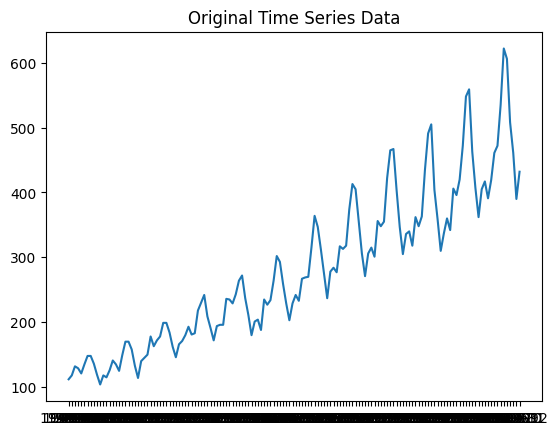

In [ ]:
#plot the data
plt.plot(data,label="Original Time Series Data")
plt.title("Original Time Series Data")
plt.show()

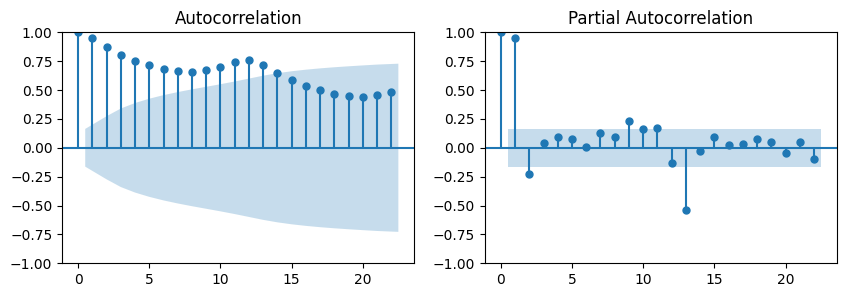

In [ ]:
#ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,ax=plt.subplots(1,2,figsize=(10,3))
plot_acf(data,ax=ax[0])
plot_pacf(data,ax=ax[1])
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [ ]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
#Scale the data
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data.values.reshape(-1,1))

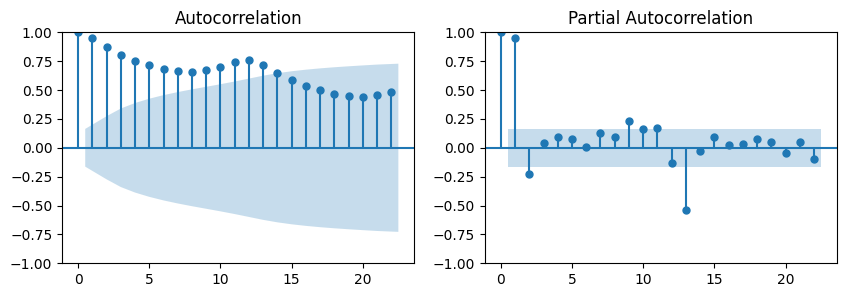

In [ ]:
#ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,ax=plt.subplots(1,2,figsize=(10,3))
plot_acf(data,ax=ax[0])
plot_pacf(data,ax=ax[1])
plt.show()

In [ ]:
#Create input-output pairs for training
def create_dataset(data,look_back=10):
  X,y=[],[]
  for i in range(len(data)-look_back-1):
    X.append(data[i:(i+look_back),0])
    y.append(data[i+look_back,0])
  return np.array(X),np.array(y)

In [ ]:
look_back=10
X,y=create_dataset(data_scaled,look_back)
X.shape

(133, 10)

In [ ]:
#Reshape input to be[samples,time steps,features]
X=np.reshape(X,(X.shape[0],look_back,1))
X.shape

(133, 10, 1)

In [ ]:
#Split into training and testing sets
train_size=int(len(data)*0.7)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [ ]:
#Build the GRU model
model=Sequential()
model.add(GRU(units=100,return_sequences=True,activation ='relu',input_shape=(X.shape[1],1)))
model.add(GRU(units=50))
model.add(Dense(1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,751 (209.96 KB)

 Trainable params: 53,751 (209.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mse')
history=model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0917
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0142
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0158
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0093
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0099
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0107
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0085
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0068
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0055
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0061
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0056
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0057
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0063
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


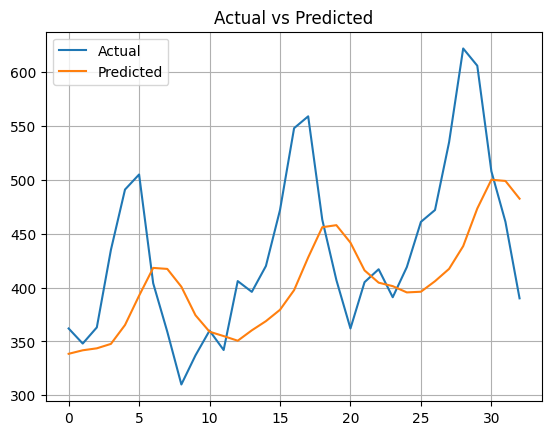

In [ ]:
#Visualize the results
predictions = model.predict(X_test) # Predict on the test data
predictions = scaler.inverse_transform(predictions) # Inverse transform the predictions to the original scale
actual=scaler.inverse_transform(y_test.reshape(-1,1))
plt.plot(actual,label='Actual')
plt.plot(predictions,label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#calculate the errors
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


#Calculate MAE and MAPE
mae = mean_absolute_error(actual, predictions)
mape = mean_absolute_percentage_error(actual, predictions)

print("Model:\n MAE:", mae, ",\nMAPE=", mape * 100)

Model:
 MAE: 60.717077081853695 ,
MAPE= 13.21483574215857
